In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wrangled_data.csv')
df.describe()

,age,is_male,weight_kg,height_m,max_bpm,avg_bpm,resting_bpm,session_duartion_h,calories_burned,fat_pct,water_intake_l,workout_frequency_dpw,experience_level,bmi
count,973.000000,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,0.525180,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,0.499622,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,0.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,0.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,1.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,1.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,1.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [3]:
df.workout_type.describe()

count          973
unique           4
top       strength
freq           258
Name: workout_type, dtype: object

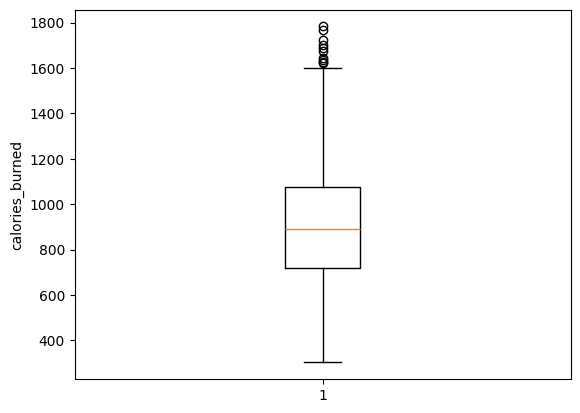

In [4]:
plt.boxplot(df.calories_burned)
plt.ylabel('calories_burned')
plt.show()

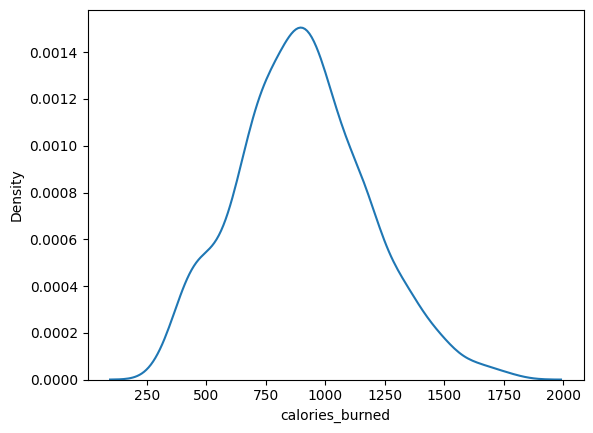

In [5]:
sns.kdeplot(df.calories_burned)
plt.show()

In [6]:
q1 = df.calories_burned.describe().iloc[4]
q3 = df.calories_burned.describe().iloc[6]
iqr = q3 - q1
ul = q3 + 1.5*iqr
print('upper_limit: ', ul)
print('n_outliers: ', (df.calories_burned >= ul).sum())

upper_limit:  1610.0
n_outliers:  10


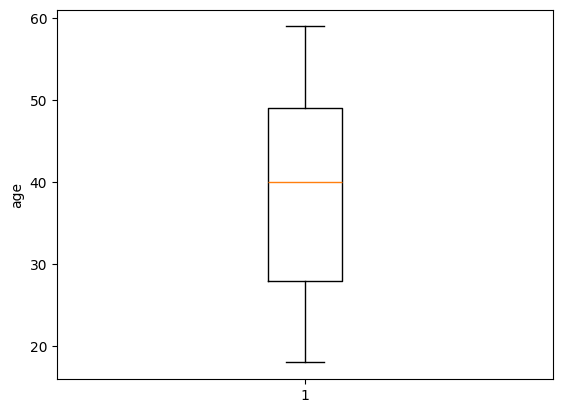

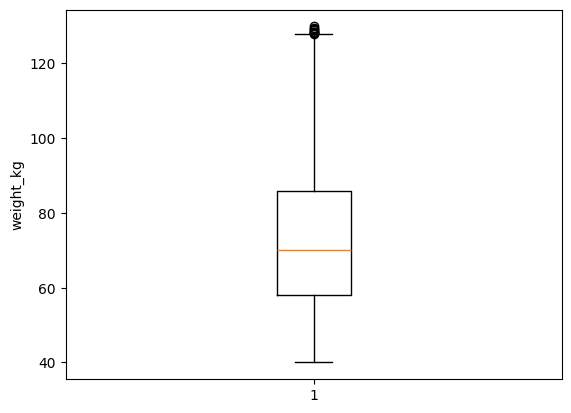

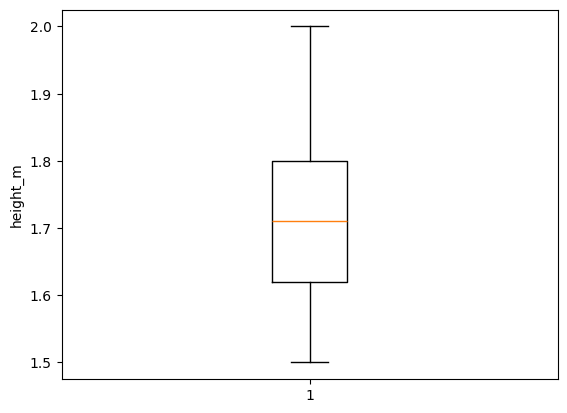

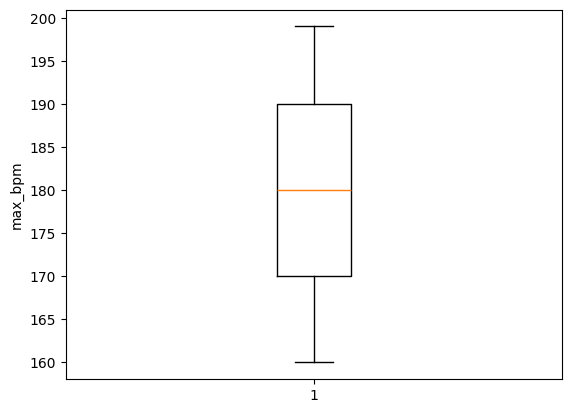

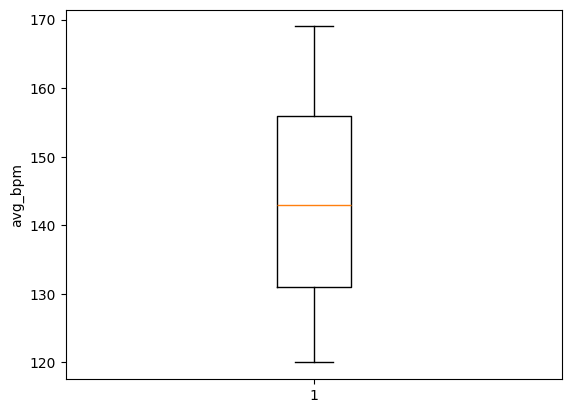

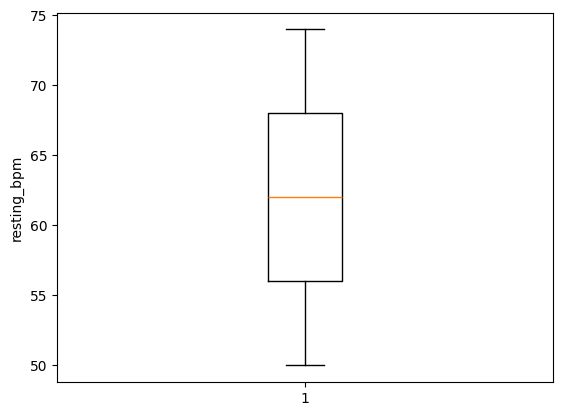

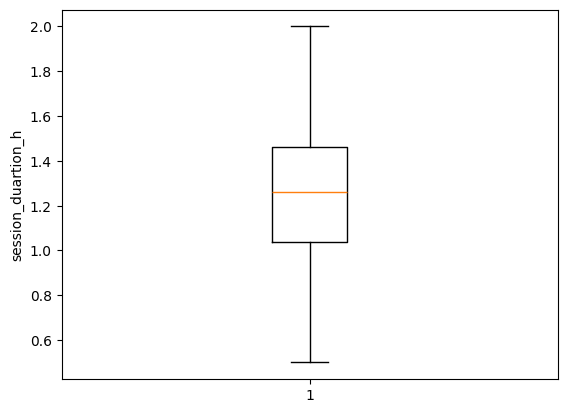

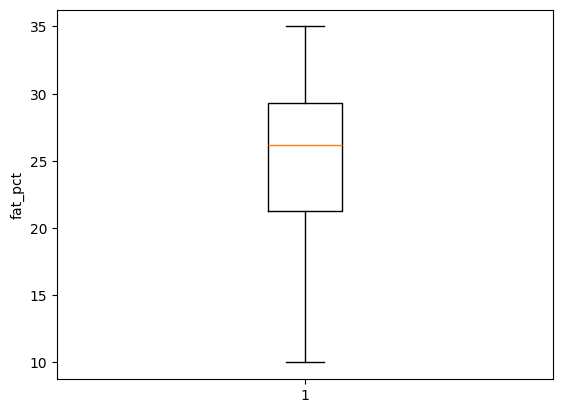

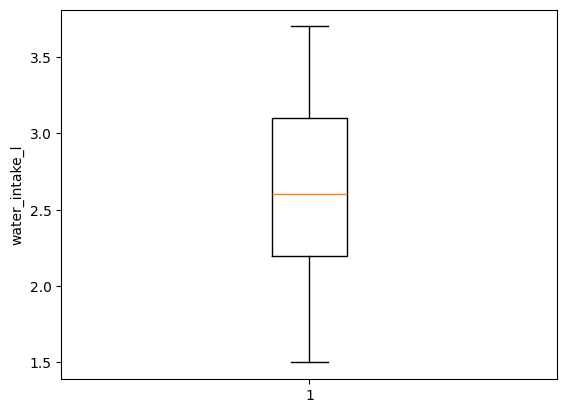

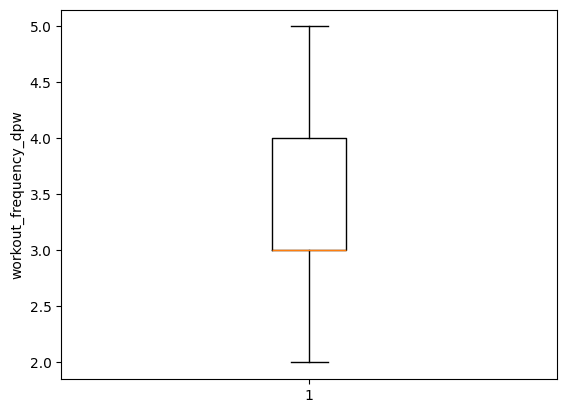

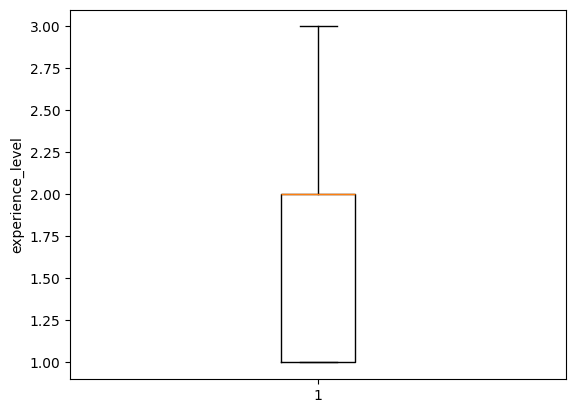

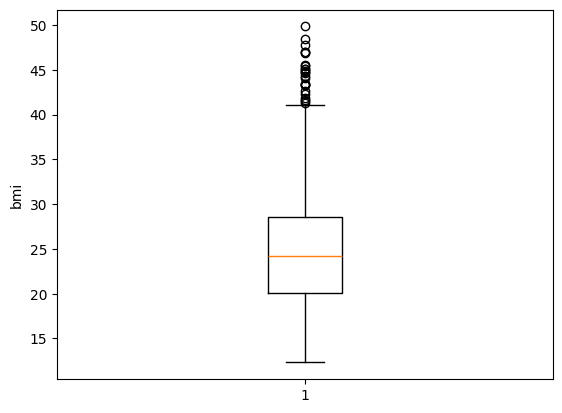

In [7]:
for var in df.drop(['is_male', 'workout_type', 'calories_burned'], axis=1).columns.to_list():
    plt.boxplot(df[var])
    plt.ylabel(var)
    plt.show()

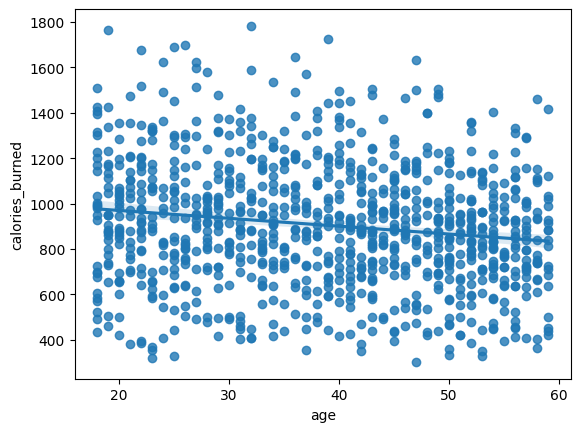

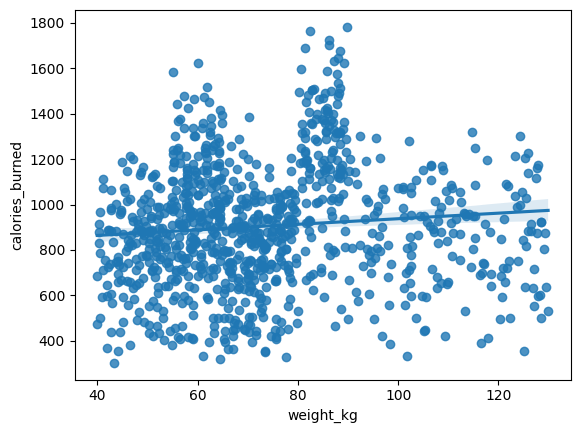

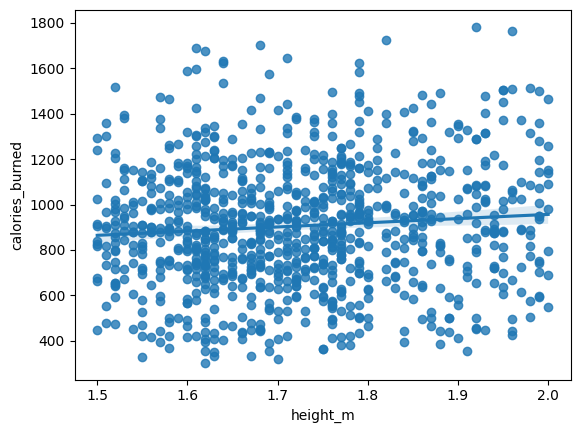

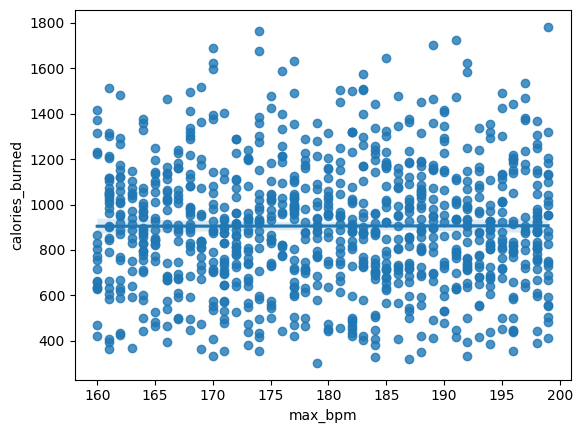

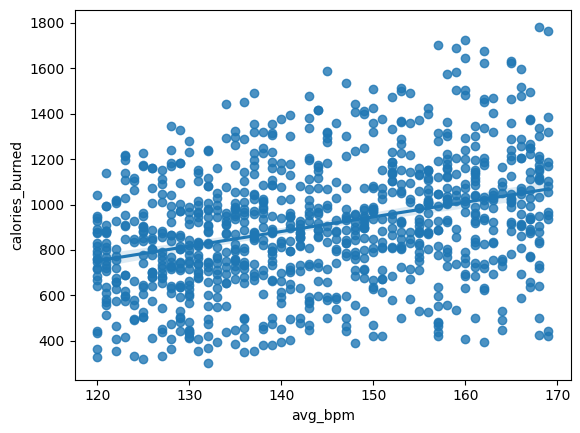

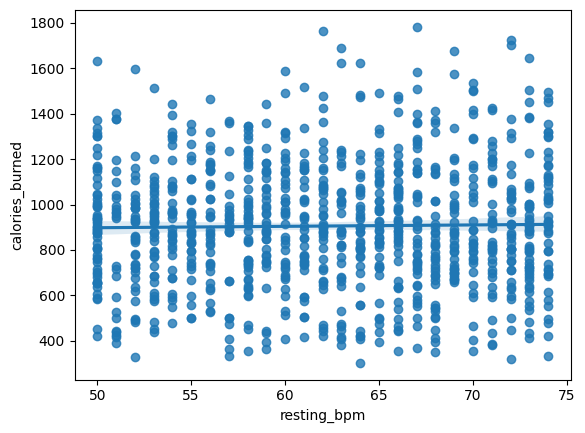

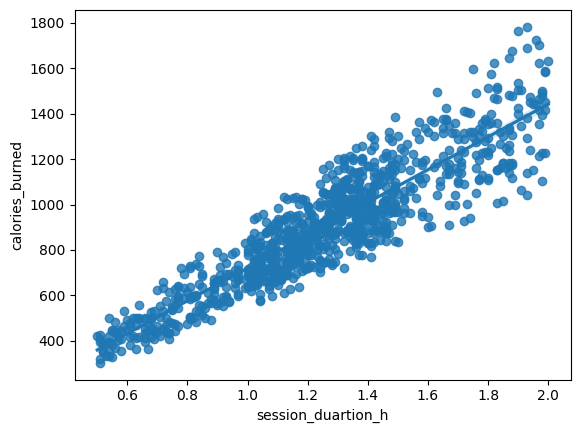

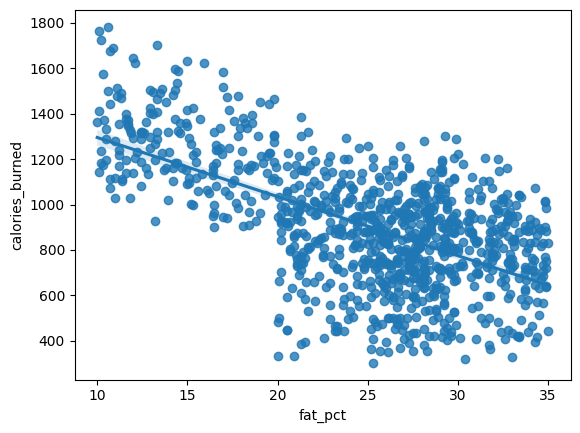

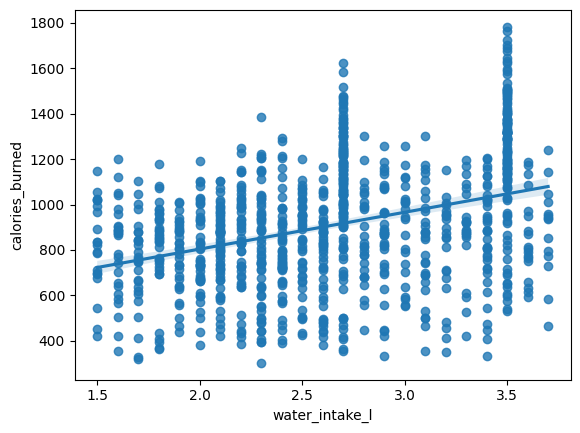

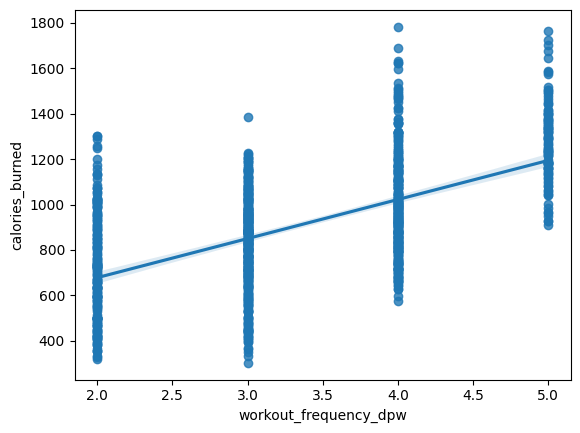

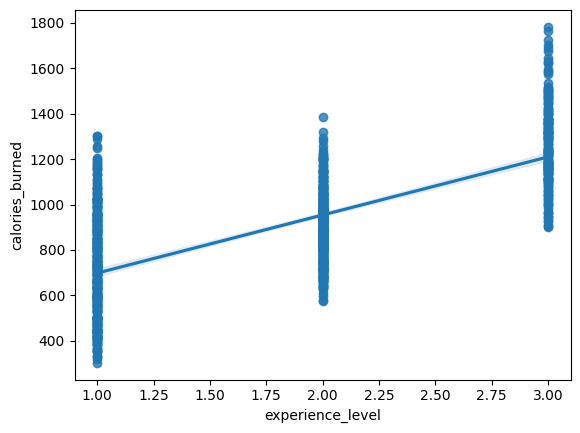

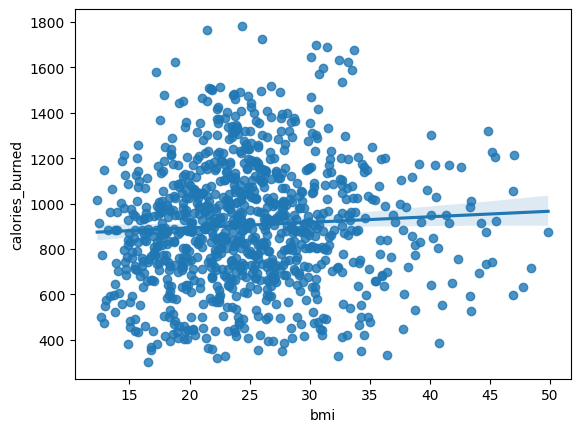

In [8]:
for var in df.drop(['is_male', 'workout_type', 'calories_burned'], axis=1).columns.to_list():
    sns.regplot(df, x=var, y='calories_burned')
    plt.show()

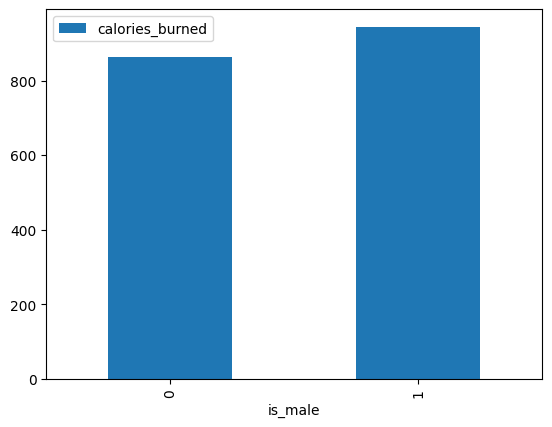

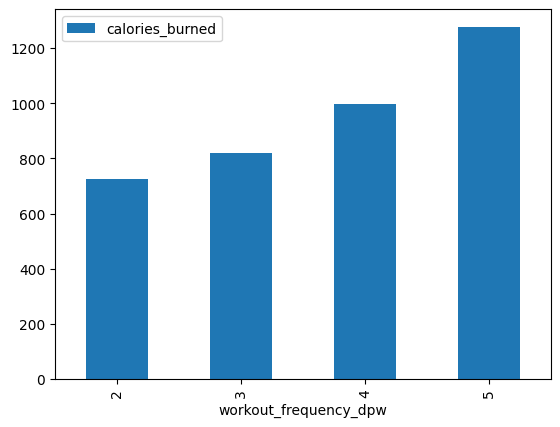

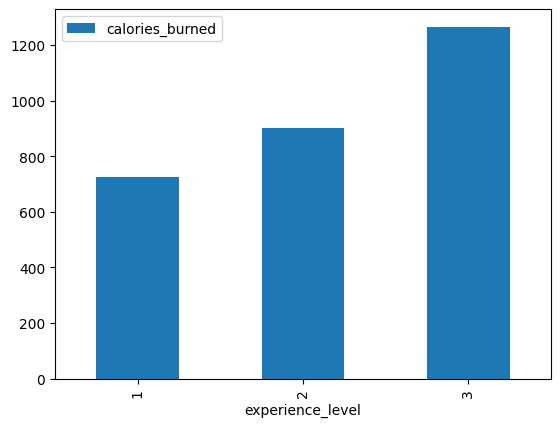

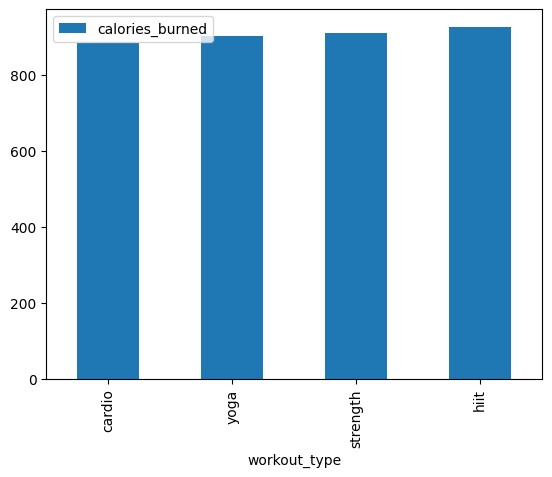

In [9]:
for var in ['is_male', 'workout_frequency_dpw', 'experience_level', 'workout_type']:
    df[[var, 'calories_burned']].groupby(var).mean().sort_values(by = 'calories_burned').plot(kind = 'bar')
    plt.show()

In [12]:
def run_f_test(tar_var, pred_var, data, confidence):

    f_list = []
    p_list = []
    
    for var in pred_var:
        formula = tar_var + '~' + var
        model = ols(formula, data).fit()
        f = sm.stats.anova_lm(model).iloc[0,3]
        p = sm.stats.anova_lm(model).iloc[0,4]
        f_list.append(f)
        p_list.append(p)

    f_test_df = pd.DataFrame({'variable': pred_var, 'F_score': f_list, 'p': p_list})
    f_test_df['significance'] = (f_test_df.p <= confidence).astype(int)
    return(f_test_df)

In [13]:
var_list = df.drop('calories_burned', axis=1).columns.to_list()
run_f_test('calories_burned', var_list, df, 0.05)

,variable,F_score,p,significance
0,age,23.801133,1.247822e-06,1
1,is_male,22.547934,2.358118e-06,1
2,weight_kg,8.926599,2.881149e-03,1
3,height_m,7.294147,7.038380e-03,1
4,max_bpm,0.004242,9.480864e-01,0
5,avg_bpm,126.631570,1.064339e-27,1
6,resting_bpm,0.265003,6.068211e-01,0
7,session_duartion_h,4568.674447,0.000000e+00,1
8,workout_type,0.949043,4.162395e-01,0
9,fat_pct,539.447093,2.952600e-95,1


In [16]:
workout_type_df = df[['workout_type', 'calories_burned']].groupby('workout_type').mean().sort_values(by = 'calories_burned').reset_index()
workout_type_df.columns = ['workout_type', 'workout_type_code']
workout_type_df

,workout_type,workout_type_code
0,cardio,884.513725
1,yoga,903.188285
2,strength,910.697674
3,hiit,925.805430


In [17]:
analyzed_df = pd.merge(df, workout_type_df, on='workout_type').drop('workout_type', axis=1)
analyzed_df.head(10)

,age,is_male,weight_kg,height_m,max_bpm,avg_bpm,resting_bpm,session_duartion_h,calories_burned,fat_pct,water_intake_l,workout_frequency_dpw,experience_level,bmi,workout_type_code
0,56,1,88.3,1.71,180,157,60,1.69,1313,12.6,3.5,4,3,30.20,903.188285
1,46,0,74.9,1.53,179,151,66,1.30,883,33.9,2.1,4,2,32.00,925.805430
2,32,0,68.1,1.66,167,122,54,1.11,677,33.4,2.3,4,2,24.71,884.513725
3,25,1,53.2,1.70,190,164,56,0.59,532,28.8,2.1,3,1,18.41,910.697674
4,38,1,46.1,1.79,188,158,68,0.64,556,29.2,2.8,3,1,14.39,910.697674
5,56,0,58.0,1.68,168,156,74,1.59,1116,15.5,2.7,5,3,20.55,925.805430
6,36,1,70.3,1.72,174,169,73,1.49,1385,21.3,2.3,3,2,23.76,884.513725
7,40,0,69.7,1.51,189,141,64,1.27,895,30.6,1.9,3,2,30.57,884.513725
8,28,1,121.7,1.94,185,127,52,1.03,719,28.9,2.6,4,2,32.34,910.697674
9,28,1,101.8,1.84,169,136,64,1.08,808,29.7,2.7,3,1,30.07,884.513725


In [19]:
def run_r_test(tar_var, pred_var, data, confidence):

    r_list = []
    p_list = []

    for var in pred_var:
        r = pearsonr(data[var], data[tar_var])[0]
        p = pearsonr(data[var], data[tar_var])[1]
        r_list.append(r)
        p_list.append(p)

    r_test_df = pd.DataFrame({'variable': pred_var, 'r': r_list, 'p': p_list})
    r_test_df['significance'] = (r_test_df.p <= confidence).astype(int)
    return(r_test_df)

In [20]:
var_list = analyzed_df.drop('calories_burned', axis=1).columns.to_list()
run_r_test('calories_burned', var_list, analyzed_df, 0.05)

,variable,r,p,significance
0,age,-0.154679,1.247822e-06,1
1,is_male,0.150646,2.358118e-06,1
2,weight_kg,0.095443,2.881149e-03,1
3,height_m,0.086348,7.038380e-03,1
4,max_bpm,0.002090,9.480864e-01,0
5,avg_bpm,0.339659,1.064339e-27,1
6,resting_bpm,0.016518,6.068211e-01,0
7,session_duartion_h,0.908140,0.000000e+00,1
8,fat_pct,-0.597615,2.952600e-95,1
9,water_intake_l,0.356931,1.313806e-30,1


In [21]:
field_list = analyzed_df.drop(['max_bpm', 'resting_bpm', 'bmi', 'workout_type_code', 'calories_burned'], axis=1).columns.to_list()
field_list.append('calories_burned')
analyzed_df = analyzed_df[field_list]
analyzed_df.head()

,age,is_male,weight_kg,height_m,avg_bpm,session_duartion_h,fat_pct,water_intake_l,workout_frequency_dpw,experience_level,calories_burned
0,56,1,88.3,1.71,157,1.69,12.6,3.5,4,3,1313
1,46,0,74.9,1.53,151,1.30,33.9,2.1,4,2,883
2,32,0,68.1,1.66,122,1.11,33.4,2.3,4,2,677
3,25,1,53.2,1.70,164,0.59,28.8,2.1,3,1,532
4,38,1,46.1,1.79,158,0.64,29.2,2.8,3,1,556


In [22]:
analyzed_df.to_csv('analyzed_data.csv', index = False)